In [ ]:
import os
import json
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils.rotation_conversions import rotation_6d_to_matrix, matrix_to_axis_angle

In [2]:
from my_render import (
    render, 
    render_opt, # take a while (about 1.5 min) to load the dataset
    gaussians as point_cloud
)

Loading trained model at iteration 1200
Found annots.json file, assuming ZJU_MoCap_refine data set!
Reading Training Transforms
Reading Test Transforms
Loading Training Cameras
Loading Test Cameras
/home/user/GauHuman/data/zju_mocap_refine/my_377 04 000000


In [4]:
a = np.load(open('/home/user/MDM/motion-diffusion-model/save/humanml_trans_enc_512/samples_humanml_trans_enc_512_000200000_seed10_the_person_walked_forward_and_is_picking_up_his_toolbox/sample00_rep01_smpl_params.npy', 'rb'), allow_pickle=True).item()
angles = matrix_to_axis_angle(rotation_6d_to_matrix(torch.tensor(a['thetas'].transpose((0, 2, 1))))).transpose(0, 1).flatten(1)
for i in range(angles.shape[0]):
    res = render(angles[[i]], f'output/render/{i:06d}.png')

/home/user/GauHuman/my_render.py:181: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  render_opt.smpl_param['poses'] = torch.tensor(pose, dtype=torch.float32, device='cuda')


In [28]:
old = render_opt.world_view_transform
render_opt.world_view_transform = torch.tensor(
    [[ 1.0000,  0.0000,  0.0000,  0.0000],
     [ 0.0000,  1.0000,  0.0000,  0.0000],
     [ 0.0000,  0.0000,  1.0000,  0.0000],
     [ 0.0000,  0.0000,  0.0000,  1.0000]],
    dtype=torch.float32, device='cuda'
)

In [46]:
old = render_opt.world_view_transform

In [60]:
render_opt.world_view_transform = old

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


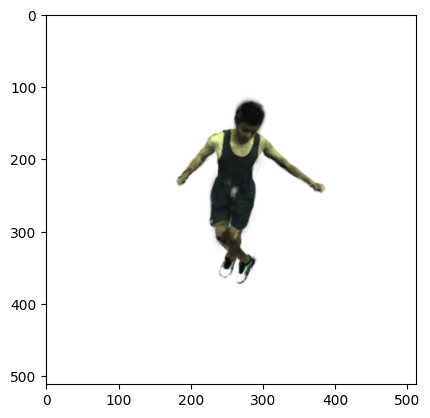

In [61]:
pose = np.concatenate([np.zeros((1, 3)), np.array(json.load(open('/home/user/EasyMocap/output/skating/smpl/000072.json'))[0]['poses'])], axis=1)
res = render(pose, 'render.png', white_back_groud=True)
plt.imshow(res)